#  Exp -5 (Linear Regression)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([1,2,3,4,5]) # input Features 
y = np.array([2,4,5,4,5])  #Target Features


In [4]:
 Slope,Intercept = np.polyfit(X,y,1) #Where 1 represends degree of polynomial

In [5]:
y_Predicted = Slope * X + Intercept

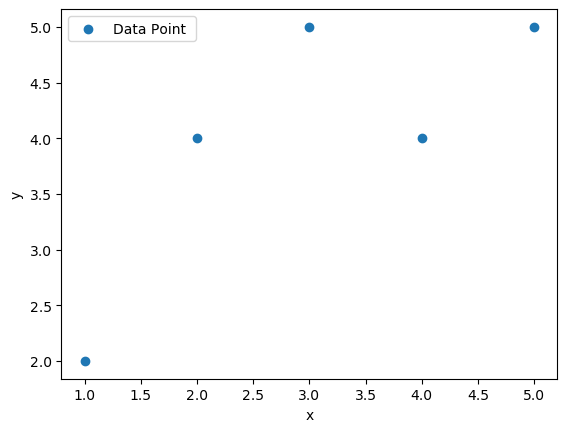

In [6]:
plt.scatter(X,y,label="Data Point ")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

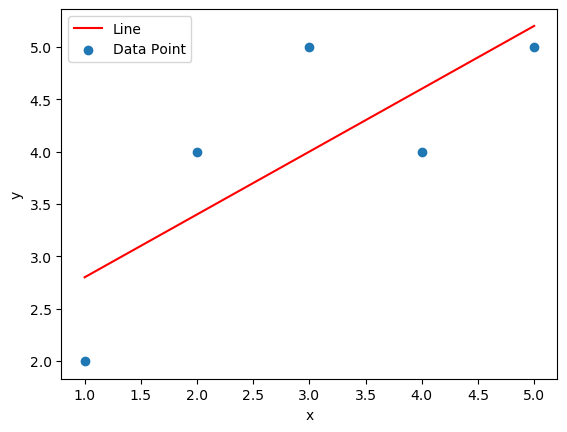

In [7]:
plt.scatter(X,y,label='Data Point')
plt.plot(X,y_Predicted,color='red',label='Line')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

# LARGE DATA SET

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv("/home/s5ad2/Downloads/car_data.csv")

In [10]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    299 non-null float64
Kms_Driven       300 non-null float64
Fuel_Type        299 non-null object
Seller_Type      298 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [12]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       1
Fuel_Type        2
Seller_Type      3
Transmission     0
Owner            0
dtype: int64

In [14]:
data['Present_Price']=data['Present_Price'].fillna(data['Present_Price'].mean())
data['Kms_Driven']=data['Kms_Driven'].fillna(data['Kms_Driven'].mean())
data['Fuel_Type']=data['Fuel_Type'].fillna(data['Fuel_Type'].mode()[0])
data['Seller_Type']=data['Seller_Type'].fillna(data['Seller_Type'].mode()[0])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null float64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [17]:
data['Year']= 2024 - data['Year']

In [18]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,sx4,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [19]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [20]:
data.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0


In [21]:
data = pd.get_dummies(data,drop_first=True)

In [22]:
data.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,3.35,5.59,27000.0,0,0,1,0,1
1,11,4.75,9.54,43000.0,0,1,0,0,1
2,7,7.25,9.85,6900.0,0,0,1,0,1
3,13,2.85,4.15,5200.0,0,0,1,0,1
4,10,4.60,6.87,42450.0,0,1,0,0,1


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Year'] = sc.fit_transform(data[['Year']])
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.128897,3.35,5.59,27000.0,0,0,1,0,1
1,0.217514,4.75,9.54,43000.0,0,1,0,0,1
2,-1.168129,7.25,9.85,6900.0,0,0,1,0,1
3,0.910335,2.85,4.15,5200.0,0,0,1,0,1
4,-0.128897,4.60,6.87,42450.0,0,1,0,0,1


In [32]:
x = data[['Year','Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
y = data[['Selling_Price']]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=20)

In [34]:
from sklearn.linear_model import LinearRegression
ir = LinearRegression()

In [35]:
ir.fit(x_train,y_train)


LinearRegression()

In [36]:
y_pred = ir.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print("R2 Score :",r2score)

R2 Score : 0.9235814633587579


In [45]:
new_test_data=[[-1.6125,8.85,45000,0,0,1,0,1]]
y_pred = ir.predict(new_test_data)
print(y_pred[0][0])

7.028353885727946


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


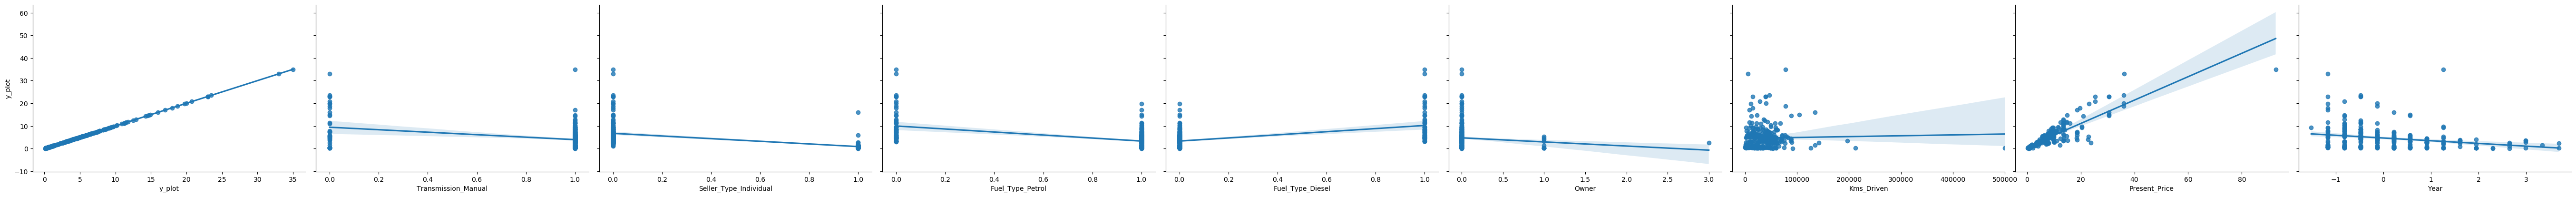

In [48]:
Data=x
Data['y_plot']=y

sns.pairplot(Data,y_vars='y_plot',x_vars=Data.columns[::-1],kind="reg",height=4 ,aspect=1.5)
plt.show()